## Sea Level Predictor

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

Use Pandas to import the data from `epa-sea-level.csv`

In [3]:
# Read data from file
df = pd.read_csv('epa-sea-level.csv')
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


Use matplotlib to create a scatter plot using the "Year" column as the x-axis and the "CSIRO Adjusted Sea Level" column as the y-axix.

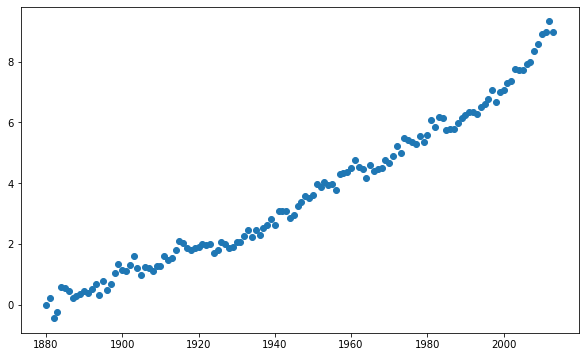

In [4]:
# Create scatter plot
x=df['Year']
y=df['CSIRO Adjusted Sea Level']
plt.figure(figsize=(10, 6))
plt.scatter(x, y)

Use the `linregress` function from `scipy.stats` to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.

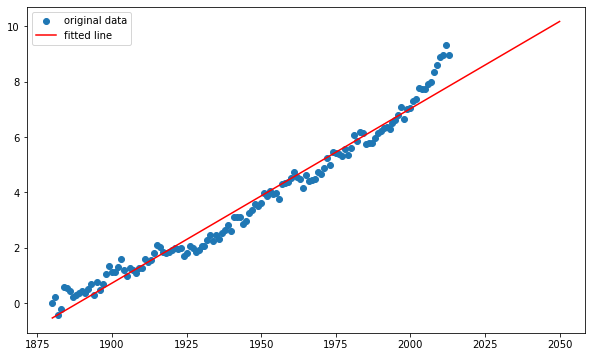

In [5]:
# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='original data')

# Create first line of best fit
res = linregress(x, y)
x_pred = pd.concat([x, pd.Series([2050])])
plt.plot(x_pred, res.intercept + res.slope*x_pred, 'r', label='fitted line')
plt.legend()

Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.

The x label should be "Year", the y label should be "Sea Level (inches)", and the title should be "Rise in Sea Level".

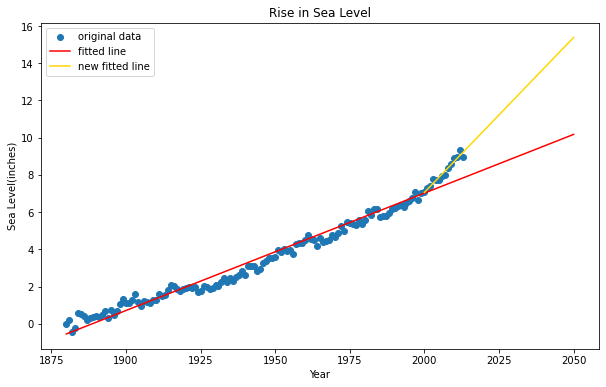

In [17]:
# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='original data')

# Create first line of best fit
res = linregress(x, y)
x_pred = pd.Series([*range(df['Year'][0], 2051)])
plt.plot(x_pred, res.intercept + res.slope*x_pred, 'r', label='fitted line')

# Create second line of best fit
df_new = df[df['Year'] >= 2000]
x_new = df_new['Year']
y_new=df_new['CSIRO Adjusted Sea Level']
res_new = linregress(x_new, y_new)
x_new_pred = pd.Series([*range(2000, 2051)])
plt.plot(x_new_pred, res_new.intercept + res_new.slope*x_new_pred, label='new fitted line', color='gold')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Sea Level(inches)')
plt.title('Rise in Sea Level')
plt.legend()